In this notebook we use the ElasticNet selected sites to assess their similarities in long-lived mice and their age-matched controls.

### Notebook imports

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.sandbox.stats as smstats
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['legend.numpoints'] = 1
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

import imp
twto = imp.load_source('twto','scripts/twang_toolbox.py')
meth = imp.load_source('meth','scripts/methy_parsing.py')

In [2]:
#Used for paper
sns.set(context = "paper", style='ticks',rc={"font.size":8,"legend.fontsize":5,"axes.titlesize":8,
                             "axes.labelsize":6,"xtick.labelsize":6,"ytick.labelsize":6, 'xtick.major.size': 3.0,
 'xtick.minor.size': 1.0,'ytick.major.size': 3.0,
 'ytick.minor.size': 1.0})

In [3]:
sns.set(context='notebook',style='white')

### Data import

In [4]:
enet_markers_f = 'data/unsupervised_analysis/EnetSites.txt'
enet_markers = twto.read_single_col_file(enet_markers_f)

In [5]:
len(enet_markers)

148

In [6]:
hdffile = 'data/AllData_combatnonpara_logage.h5'
combined_df = pd.read_hdf(hdffile,'methy_mat')
adams_covar = pd.read_csv('data/meta_data/AdamsMetaData.txt',sep='\t',header=0,index_col=0)

In [7]:
adams_combined = combined_df.loc[adams_covar.index]

### Conduct PCA

In [8]:
adams_combined_enet =adams_combined[enet_markers]
adams_combined_enet_centered = adams_combined_enet-adams_combined_enet.mean()
X_r,exp = meth.do_pca_2components(adams_combined_enet_centered)
pc_df = pd.DataFrame(X_r,index=adams_combined.index,columns=['pc1','pc2'])
adams_pca = adams_covar.join(pc_df)

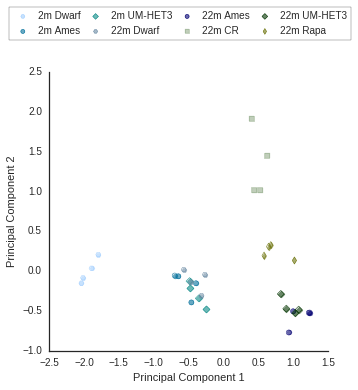

In [9]:
#fig = plt.figure(figsize=(5,5)) 
#gs.update(wspace=0.5,hspace=1.1) 
f,axes = plt.subplots(1,1,figsize=(5,5))
map_treatment = {'NT':'NT', 'WT':'NT', 'D':'D', 'Rapa':'Rapa', 'CR':'CR'}
#adams_pca = pc_dict[lab]
adams_pca['treatment'] = adams_pca['treatment'].map(map_treatment)
#adams_pca['pc1'] = adams_pca['pc1']*-1
var = exp
cc = sns.color_palette("Set2", 8).as_hex()
i=0
adams_age_pal_dict = {22:sns.xkcd_rgb['black'],2:sns.xkcd_rgb["grey"]}
map_treatment_dict = {'Ames':{'D':'Ames\ndwarf','NT':'Ames'},'Miller':{'NT':'UMHET3','Rapa':'UMHET3 Rapa','CR':'UMHET3 CR'}}
adams_xkcd_pal_dict = {'Ames':{2:{'D':sns.xkcd_rgb["baby blue"],'NT':sns.xkcd_rgb["ocean blue"]},22:{'D':sns.xkcd_rgb["grey blue"],'NT':sns.xkcd_rgb["deep blue"]}},
                       'Miller':{2:{'NT':sns.xkcd_rgb["greenish blue"]},22:{'NT':sns.xkcd_rgb["dark green"],'Rapa':sns.xkcd_rgb["olive"],'CR':sns.xkcd_rgb["greenish grey"]}}}
markers_dict = {'Ames':{'D':'H','NT':'o'},'Miller':{'NT':'D','Rapa':'d','CR':'s'}}
map_treatment_dict = {'Ames':{'D':'Dwarf','NT':'Ames'},'Miller':{'NT':'UM-HET3','Rapa':'Rapa','CR':'CR'}}
handles=[]
labels=[]
for k3,grp in adams_pca.groupby('Age_month'):
    i=0
    for k,grp2 in grp.groupby('mouse'):
        markers = markers_dict[k]
        map_treatment = map_treatment_dict[k]
        for tt,grp3 in grp2.groupby('treatment'):
            color = adams_xkcd_pal_dict[k][k3][tt]
            lab = '{}m {}'.format(k3,map_treatment[tt])
            edge = axes.scatter(grp3['pc1'],grp3['pc2'],label=lab,marker=markers[tt],color=color,facecolor='none',linewidth=0.5,s=25)
            face = axes.scatter(grp3['pc1'],grp3['pc2'],label=lab,marker=markers[tt],color=color,s=25,alpha=0.6)
            if lab not in labels:
                handles.append((edge,face))
                labels.append(lab)
#handles,labels = axes.get_legend_handles_labels()
axes.set_xlabel('Principal Component 1')
axes.set_ylabel('Principal Component 2')
#axes = plt.subplot2grid((2,2),(1,1),colspan=2)
#axes.legend([handles[1],handles[5]]+handles[9:12:2]+[handles[-1]],[labels[1],labels[5]]+labels[9:12:2]+[labels[-1]],
#            frameon=True,ncol=3,
            #bbox_to_anchor=(1,0.5),
#            loc='lower left',
#            columnspacing=0.1,labelspacing=0.1,handletextpad=0.1)
#axes.set_ylim([-2,2])
axes.legend(handles,labels,frameon=True,ncol=4,columnspacing=0.5,labelspacing=0.5,handletextpad=0.5
            ,bbox_to_anchor=(1.1,1.25),markerscale=0.8)
sns.despine()
plt.show()
plt.close()

/cellar/users/twang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


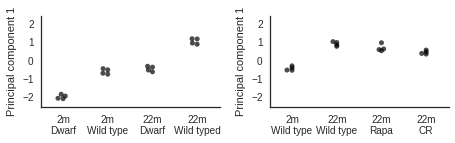

In [10]:
f,axes = plt.subplots(1,2,figsize=(6.5,2))
axes_a = axes[0]
axes_m = axes[1]
axes_dict = {'Ames':axes_a,'Miller':axes_m}
map_mouse_dict = {'Ames':'Ames\ncontrol','Miller':'UM-HET3\ncontrol'}
map_mouse_colors = {'Ames':[sns.xkcd_rgb["baby blue"],sns.xkcd_rgb["ocean blue"],sns.xkcd_rgb["grey blue"],sns.xkcd_rgb["deep blue"]],
                    'Miller':[sns.xkcd_rgb["greenish blue"],sns.xkcd_rgb["dark green"],sns.xkcd_rgb["olive"],sns.xkcd_rgb["greenish grey"]]}
map_cohort_names = {'DY':'2m\nDwarf','WTY':'2m\nWild type','DO':'22m\nDwarf','WTO':'22m\nWild typed',
                    'Young':'2m\nWild type','Old':'22m\nWild type','Rapa':'22m\nRapa','CR':'22m\nCR'}
map_mouse = {'Ames':'Ames','Miller':'UM-HET3'}
order_dict = {'Ames':[map_cohort_names[x] for x in ['DY','WTY','DO','WTO']],'Miller':[map_cohort_names[x] for x in ['Young','Old','Rapa','CR']]}
for k,grp in adams_pca.groupby('mouse'):
    i=0
    ax = axes_dict[k]
    color = map_mouse_colors[k]
    grp['Treatment'] = grp['Cohort'].map(map_cohort_names)
    ax = sns.swarmplot(x=grp['Treatment'],y=grp['pc1'],color='black',order=order_dict[k],ax=ax,size=5,alpha=0.7)
    ax.set_ylabel('Principal component 1')
    ax.set_xlabel('')
    #ax.set_xlabel(map_mouse[k])
    ax.set_ylim([-2.5,2.5])
    sns.despine()
sns.despine()
f.tight_layout()
plt.show()
plt.close()

In [11]:
ames_pca = adams_pca.loc[adams_pca.mouse=='Ames']
umhet_pca = adams_pca.loc[adams_pca.mouse=='Miller']

In [12]:
treatments_ames = ames_pca.treatment
treatments_ames_cat = treatments_ames.astype("category", categories=["WT","D"], ordered=False)
ames_pca['treatmentcat'] = treatments_ames_cat

/cellar/users/twang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
mod_ames = smf.ols('pc1~Age_month+treatmentcat',data=ames_pca).fit()
mod_ames.summary()

/cellar/users/twang/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pc1   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     289.1
Date:                Wed, 28 Dec 2016   Prob (F-statistic):           2.65e-06
Time:                        13:59:25   Log-Likelihood:                 6.3019
No. Observations:                   8   AIC:                            -8.604
Df Residuals:                       6   BIC:                            -8.445
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -1.0432      0.035    -29.726      0.000        -1.129    -0.957
treatmentcat[T.D]    -1.0432      0.035    -29.726      0.000        -1.129    -0.957
Age_month             0.0764      0.004     17.004      0.000         0.065     0.087
==============================================================================
Omnibus:                        2.315   Durbin-Watson:                   2.977
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                0.794
Skew:                          -0.002   Prob(JB):                        0.672
Kurtosis:                       1.457   Cond. No.                     3.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
mod_ames.pvalues

Intercept            9.610992e-08
treatmentcat[T.D]    9.610992e-08
Age_month            2.646038e-06
dtype: float64

In [15]:
#Multivariate linear model with UM-HET3 background
umhet3_treatment = umhet_pca.treatment
umhet3_treatmentcat = umhet3_treatment.astype("category", categories=["NT","CR","Rapa"], ordered=False)
umhet_pca['treatmentcat'] = umhet3_treatmentcat

/cellar/users/twang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
mod_het = smf.ols('pc1~Age_month+treatmentcat',data=umhet_pca).fit()
mod_het.summary()

/cellar/users/twang/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pc1   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     74.66
Date:                Wed, 28 Dec 2016   Prob (F-statistic):           4.96e-08
Time:                        13:59:27   Log-Likelihood:                 11.464
No. Observations:                  16   AIC:                            -14.93
Df Residuals:                      12   BIC:                            -11.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -0.5240      0.075     -6.952      0.000        -0.688    -0.360
treatmentcat[T.CR]      -0.4656      0.097     -4.825      0.000        -0.676    -0.255
treatmentcat[T.Rapa]    -0.2269      0.097     -2.351      0.037        -0.437    -0.017
Age_month                0.0674      0.005     13.959      0.000         0.057     0.078
==============================================================================
Omnibus:                        2.798   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.788
Skew:                           0.814   Prob(JB):                        0.409
Kurtosis:                       2.816   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
mod_het.pvalues

Intercept               1.533656e-05
treatmentcat[T.CR]      4.156421e-04
treatmentcat[T.Rapa]    3.664484e-02
Age_month               8.818749e-09
dtype: float64

### Hierarchical Clustering

In [18]:
adams_covar['mouse'] = map(lambda z: ['Ames','Miller'][z],[x.startswith('Miller') for x in adams_covar['FileName'].values])

In [19]:
map_cohort_names = {'DO':'D', 'WTO':'W', 'DY':'D', 'WTY':'W', 'Young':'W', 
                    'Old':'W', 'Rapa':'R', 'CR':'C'}
map_names = adams_covar['Cohort'].map(map_cohort_names)
map_names_d = {ind:map_names[ind] for ind in map_names.index}

In [20]:
map_colors = {'DO':sns.xkcd_rgb["grey blue"], 'WTO':sns.xkcd_rgb["deep blue"], 'DY':sns.xkcd_rgb["baby blue"], 'WTY':sns.xkcd_rgb["ocean blue"], 'Young':sns.xkcd_rgb["greenish blue"], 
                    'Old':sns.xkcd_rgb["dark green"], 'Rapa':sns.xkcd_rgb["olive"], 'CR':sns.xkcd_rgb["greenish grey"]}
colors_treatment = adams_covar.loc[adams_covar.index,'Cohort'].map(map_colors)

In [21]:
weights = pd.read_csv('data/epigenetic_aging_model/EnetSites_with_weights.txt',sep='\t',header=None,index_col=0,squeeze=True)

In [22]:
adams_corrected_enet = adams_combined[enet_markers]
topper=20
topstd = adams_corrected_enet.std().sort_values(ascending=False).iloc[:topper].index
tocluster = adams_corrected_enet[topstd]
tocluster.index = pd.Series(tocluster.index).map(map_names_d)

In [23]:
tocluster_all = adams_corrected_enet
tocluster_all.index = pd.Series(tocluster_all.index).map(map_names_d)

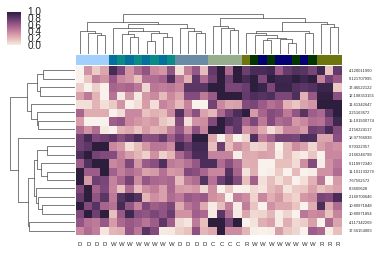

In [24]:
tocluster.columns = [':'.join(x.split(':')[:2]) for x in tocluster.columns]
g = sns.clustermap(tocluster.T,standard_scale=0,col_colors=colors_treatment,yticklabels=True,figsize=(6,4))
tt=plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=6,rotation=0)
tt=plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=4,rotation=360)

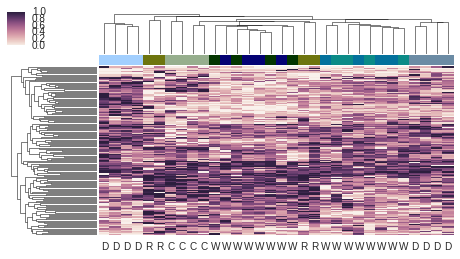

In [25]:
g = sns.clustermap(tocluster_all.T,standard_scale=0,col_colors=colors_treatment,yticklabels=False,figsize=(8,4))